In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from utils import *
from mpl_toolkits.mplot3d import Axes3D

windows = 350

In [2]:
utilization_path = "./data/MI_timesteps.txt"
utilization_data = pd.read_csv(utilization_path, header='infer', delimiter=" ", skiprows=range(1, 1001))

In [68]:
utilization_data.columns[1]

'areaDensityCounting-PID5'

In [4]:
utilization_data

,timeStep,areaDensityCounting-PID5,areaDensityCounting-PID6,areaDensityCounting-PID7,areaDensityCounting-PID8,areaDensityCounting-PID9,areaDensityCounting-PID10,areaDensityCounting-PID11,areaDensityCounting-PID12,areaDensityCounting-PID13
0,1001,0,2,97,7,0,0,5,1,43
1,1002,0,2,96,7,0,0,5,1,45
2,1003,0,2,95,6,0,0,5,0,46
3,1004,0,2,94,6,0,0,4,1,46
4,1005,0,2,92,6,0,0,5,0,46
...,...,...,...,...,...,...,...,...,...,...
13996,14997,0,10,95,4,0,0,2,1,39
13997,14998,0,10,94,3,0,0,3,1,39
13998,14999,0,10,93,3,0,1,2,1,40
13999,15000,0,10,93,3,0,1,3,1,41


## First Part

In [5]:
PID5 = np.array(utilization_data['areaDensityCounting-PID5'])
PID6 = np.array(utilization_data['areaDensityCounting-PID6'])
PID7 = np.array(utilization_data['areaDensityCounting-PID7'])

<function matplotlib.pyplot.show(*args, **kw)>

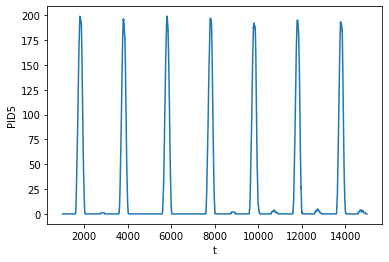

In [7]:
# plot original dataset
plt.plot(utilization_data['timeStep'], PID5)
plt.xlabel('t')
plt.ylabel('PID5')
plt.show

In [8]:
# create windows of the first three measurementareas
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window, window + 1)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

PID5_slided = rolling_window(PID5, windows)
PID6_slided = rolling_window(PID6, windows)
PID7_slided = rolling_window(PID7, windows)

In [9]:
data =  np.concatenate((PID5_slided, PID6_slided, PID7_slided),axis=1)
data_norm = (data - data.mean(axis=0)) / data.std(axis=0)

In [57]:
# apply PCA with 3 components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
projected = pca.fit_transform(data_norm)
pca.set_params(copy=True)

explained_variance_sk = pca.explained_variance_ratio_
expl_var_cumsum_sk = np.cumsum(explained_variance_sk)

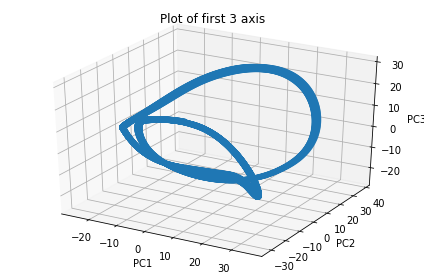

In [59]:
# plot embedding space
fig = plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Plot of first 3 axis')
fig.tight_layout()

## Part 2

In [121]:
def measurement(df, pca):
    PID = np.array(df)
    PID_norm = (PID - PID.mean(axis=0)) / PID.std(axis=0)
    PID_norm = PID_norm.reshape(-1, 1)    
    projected_PID = pca.transform(PID_norm)
    return projected_PID

#PID5_norm = (PID5 - PID5.mean(axis=0)) / PID5.std(axis=0)
#PID5_norm.reshape(-1, 1)
#PID5_slided_norm = (PID5_slided - PID5_slided.mean(axis=0)) / PID5_slided.std(axis=0)
#PID5_slided_norm = PID5_slided_norm.reshape(-1, 1)

In [116]:
projected_PID5 = pca.transform(PID5_norm[0].reshape(-1, 1))
projected_PID6 = pca.transform(PID6_norm[0].reshape(-1, 1))

In [101]:
projected_PID5.shape

(351, 3)

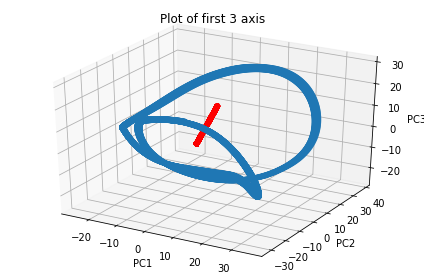

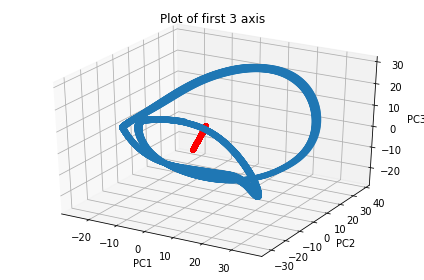

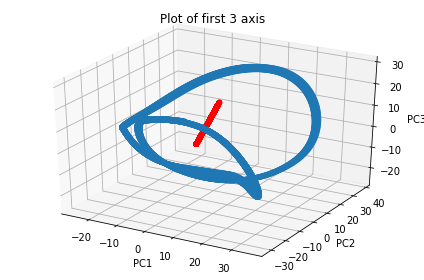

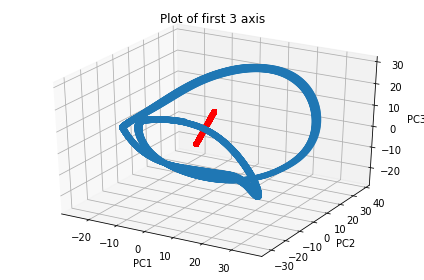

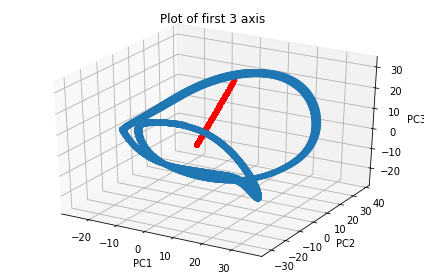

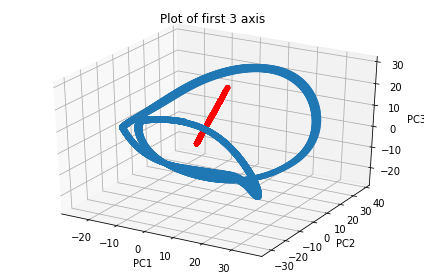

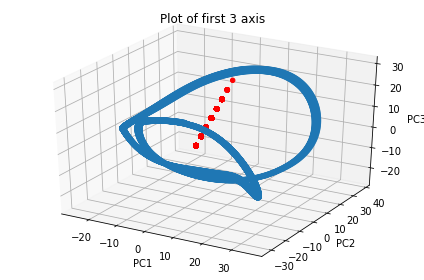

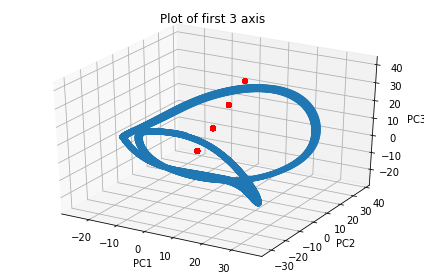

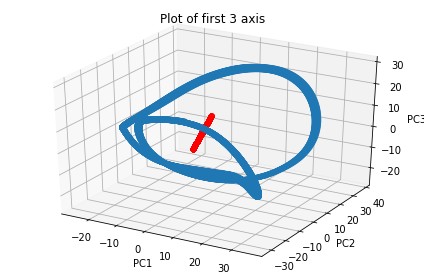

In [125]:
for i in range(1, 10):
    fig = plt.figure()
    ax=fig.add_subplot(111,projection="3d")
    ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2])
    proj = measurement(utilization_data[utilization_data.columns[i]], pca)
    ax.scatter(proj[:, 0], proj[:, 1], proj[:, 2], c = 'red')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('Plot of first 3 axis')
    fig.tight_layout()

## Part 3

In [182]:
print(projected[:10,:])

[[-0.91251446 -6.93923147 10.80997152]
 [-1.05884152 -6.8639435  10.77665561]
 [-1.20452839 -6.78961848 10.74308438]
 [-1.34957528 -6.71625297 10.70926057]
 [-1.49421654 -6.64385984 10.67589122]
 [-1.63810937 -6.57312965 10.6436816 ]
 [-1.78172036 -6.50265379 10.61052105]
 [-1.92493274 -6.43314199 10.57782009]
 [-2.06751584 -6.36457546 10.54487561]
 [-2.20970403 -6.29696698 10.51239459]]


In [188]:
print(projected[1994:2004,:])

[[-0.95186127 -7.14669813 10.54131198]
 [-1.09561125 -7.07155625 10.51059495]
 [-1.23873667 -6.99736616 10.47964103]
 [-1.38125355 -6.92349469 10.44839719]
 [-1.52349067 -6.84988087 10.41621939]
 [-1.66556543 -6.77725096 10.38522246]
 [-1.80736246 -6.70487815 10.35329349]
 [-1.94911118 -6.63277942 10.32113893]
 [-2.08953742 -6.56301904 10.29016717]
 [-2.22924757 -6.49427895 10.26032648]]


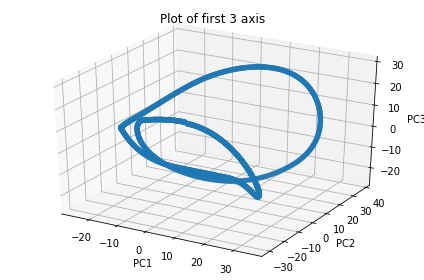

In [184]:
# manually check the loop to prevent over compute
fig = plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(projected[:1993, 0], projected[:1993, 1], projected[:1993, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Plot of first 3 axis')
fig.tight_layout()

In [189]:
x0 = projected[:1993,:]
x1 = projected[1:1994,:]

In [190]:
del_t = 0.1
vec = (x1 - x0) / del_t

In [206]:
Approximator = NonlinearApprox(1000,2)
v_hat = Approximator.radial_approx(x0, vec)
x1_hat = v_hat * del_t + x0
mse = np.square(x1 - x1_hat).sum()
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.0002589692024834552


## Part 4